In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-8.784215964483266 32.34524899226449
-4.261974807371885 60.70287235595026
-7.330632681801532 -94.93200190327875
30.423148110216417 -51.200827632381475
-24.61111723084086 -145.09662885716426
-17.41684877390503 -145.8338727448915
-75.87731149288882 -63.77682243150744
89.50237016160506 29.98396889701064
34.21312188521695 -172.68069057820162
-55.95197487972007 107.56173336356937
13.555734665110833 16.710159445481708
59.074671581373394 150.48366258446094
48.9537304212127 174.8347101473122
71.40517708326436 33.91948572726753
-6.9037737481993275 -40.608346275877494
-37.735747233286794 -134.13453605390052
-74.39517587858658 -138.0096230911297
-8.134811886570617 131.34750044667607
48.46109202867882 19.355774134080065
35.31269779141719 -139.08044204382577
-72.46332010290622 132.51463428928622
-75.32121369602565 -78.4567960908011
-76.23755001076964 132.17766252017663
-42.016954765223836 179.34837277905592
-61.06401262995089 152.91702032674795
-69.57615879564523 52.43175440402041
-23.2865029441347

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=380381e2b26896999f1b2e8ebae9cdfc


In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laela
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | moussoro
Processing Record 12 of Set 1 | magadan
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 15 of Set 1 | pio ix
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | tual
Processing Record 18 of Set 1 | detva
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | otane
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | nukus
Processing Record 40 of Set 4 | loiza
Processing Record 41 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 42 of Set 4 | severnoye
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | huitan
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | atikokan
Processing Record 48 of Set 4 | denpasar
Processing Record 49 of Set 4 | qandala
Processing Record 50 of Set 4 | san martin
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | guatire
Processing Record 5 of Set 5 | alcantara
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | zhangjiakou
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | antalaha
Processing Record 11 of Set 5 | necoc

Processing Record 23 of Set 8 | crixas
Processing Record 24 of Set 8 | faya
Processing Record 25 of Set 8 | karratha
Processing Record 26 of Set 8 | avera
Processing Record 27 of Set 8 | bethel
Processing Record 28 of Set 8 | kahului
Processing Record 29 of Set 8 | jumla
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | berezanka
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | barcelos
Processing Record 34 of Set 8 | mecca
Processing Record 35 of Set 8 | neryungri
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | puerto rondon
Processing Record 38 of Set 8 | namtsy
Processing Record 39 of Set 8 | kaspiyskiy
Processing Record 40 of Set 8 | poli
Processing Record 41 of Set 8 | kropotkin
Processing Record 42 of Set 8 | upata
Processing Record 43 of Set 8 | burley
Processing Record 44 of Set 8 | utiroa
City not found. Skipping...
Processing Record 45 of Set 8 | dera ghazi khan
Processing Record 46 of Set 8 | vostok


Processing Record 8 of Set 12 | musoma
Processing Record 9 of Set 12 | pakpattan
Processing Record 10 of Set 12 | shaowu
Processing Record 11 of Set 12 | port-gentil
Processing Record 12 of Set 12 | waipawa
Processing Record 13 of Set 12 | huai yot
Processing Record 14 of Set 12 | mbini
Processing Record 15 of Set 12 | pokhara
Processing Record 16 of Set 12 | aberystwyth
Processing Record 17 of Set 12 | iberia
Processing Record 18 of Set 12 | tabou
Processing Record 19 of Set 12 | ca mau
Processing Record 20 of Set 12 | planaltina
Processing Record 21 of Set 12 | marawi
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | barnala
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | swan hill
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | uvarovka
Processing Record 29 of Set 12 | minna
Processing Record 30 of Set 12 | port hawkesbury
Processing Record 31 of Set 12 | leh
Processing

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laela,-8.5667,32.0500,61.21,90,100,3.11,TZ,2022-12-13 01:46:21
1,Victoria,22.2855,114.1577,61.32,67,97,13.00,HK,2022-12-13 01:42:09
2,Puerto Ayora,-0.7393,-90.3518,70.56,95,50,1.99,EC,2022-12-13 01:46:22
3,Saint George,37.1041,-113.5841,39.94,72,0,3.44,US,2022-12-13 01:43:44
4,Mataura,-46.1927,168.8643,79.57,32,91,2.91,NZ,2022-12-13 01:46:23
5,Tautira,-17.7333,-149.1500,76.03,78,100,12.30,PF,2022-12-13 01:46:23
6,Ushuaia,-54.8000,-68.3000,47.86,61,75,5.75,AR,2022-12-13 01:42:45
7,Longyearbyen,78.2186,15.6401,6.64,61,75,17.27,SJ,2022-12-13 01:46:24
8,Kapaa,22.0752,-159.3190,84.18,69,40,23.02,US,2022-12-13 01:46:00
9,Albany,42.6001,-73.9662,23.65,73,6,3.74,US,2022-12-13 01:44:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laela,TZ,2022-12-13 01:46:21,-8.5667,32.0500,61.21,90,100,3.11
1,Victoria,HK,2022-12-13 01:42:09,22.2855,114.1577,61.32,67,97,13.00
2,Puerto Ayora,EC,2022-12-13 01:46:22,-0.7393,-90.3518,70.56,95,50,1.99
3,Saint George,US,2022-12-13 01:43:44,37.1041,-113.5841,39.94,72,0,3.44
4,Mataura,NZ,2022-12-13 01:46:23,-46.1927,168.8643,79.57,32,91,2.91
5,Tautira,PF,2022-12-13 01:46:23,-17.7333,-149.1500,76.03,78,100,12.30
6,Ushuaia,AR,2022-12-13 01:42:45,-54.8000,-68.3000,47.86,61,75,5.75
7,Longyearbyen,SJ,2022-12-13 01:46:24,78.2186,15.6401,6.64,61,75,17.27
8,Kapaa,US,2022-12-13 01:46:00,22.0752,-159.3190,84.18,69,40,23.02
9,Albany,US,2022-12-13 01:44:15,42.6001,-73.9662,23.65,73,6,3.74


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

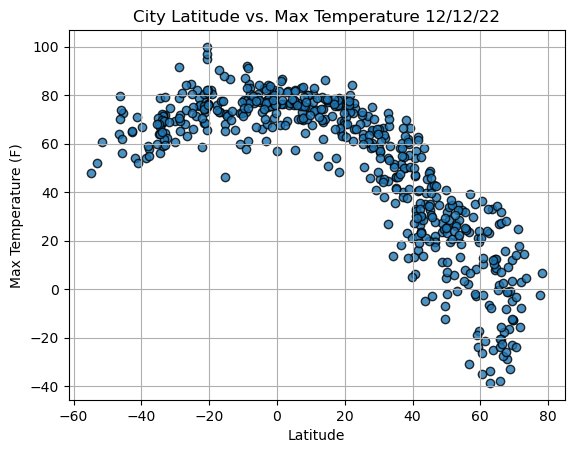

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

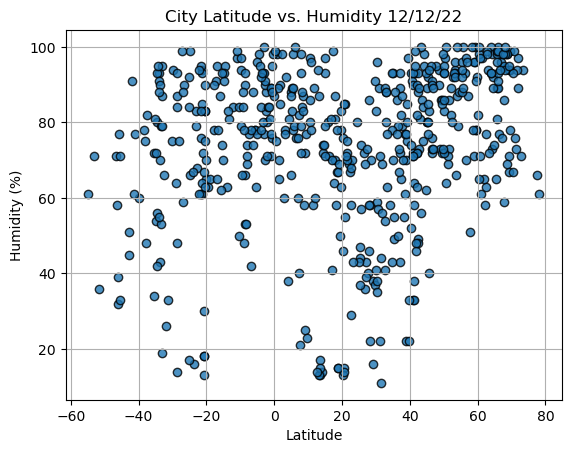

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

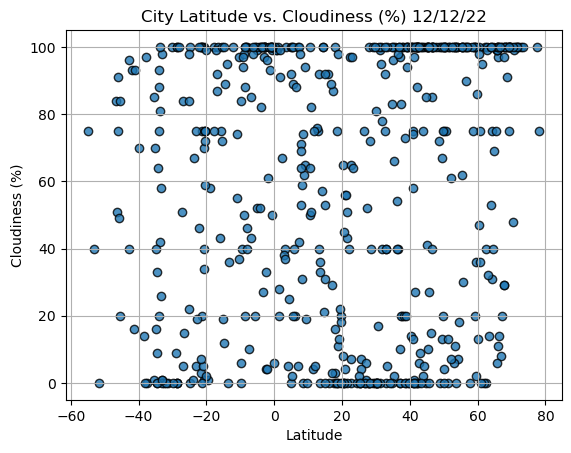

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

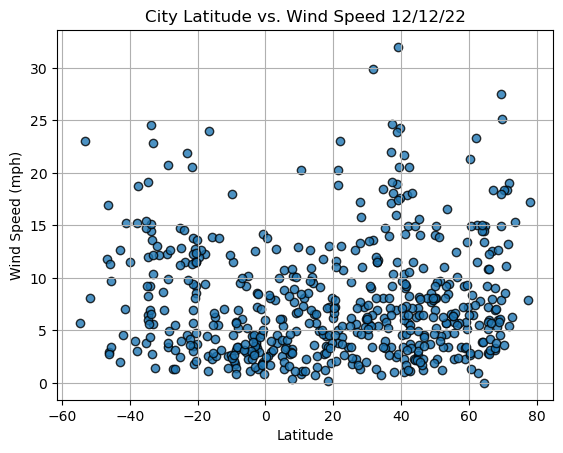

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: invalid syntax (2317673131.py, line 3)

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Pio Ix
Country                        BR
Date          2022-12-13 01:46:26
Lat                       -6.8375
Lng                      -40.5792
Max Temp                    76.62
Humidity                       42
Cloudiness                     85
Wind Speed                   6.08
Name: 13, dtype: object

In [24]:
 city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
543     True
544     True
545     True
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Victoria,HK,2022-12-13 01:42:09,22.2855,114.1577,61.32,67,97,13.00
3,Saint George,US,2022-12-13 01:43:44,37.1041,-113.5841,39.94,72,0,3.44
7,Longyearbyen,SJ,2022-12-13 01:46:24,78.2186,15.6401,6.64,61,75,17.27
8,Kapaa,US,2022-12-13 01:46:00,22.0752,-159.3190,84.18,69,40,23.02
9,Albany,US,2022-12-13 01:44:15,42.6001,-73.9662,23.65,73,6,3.74


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

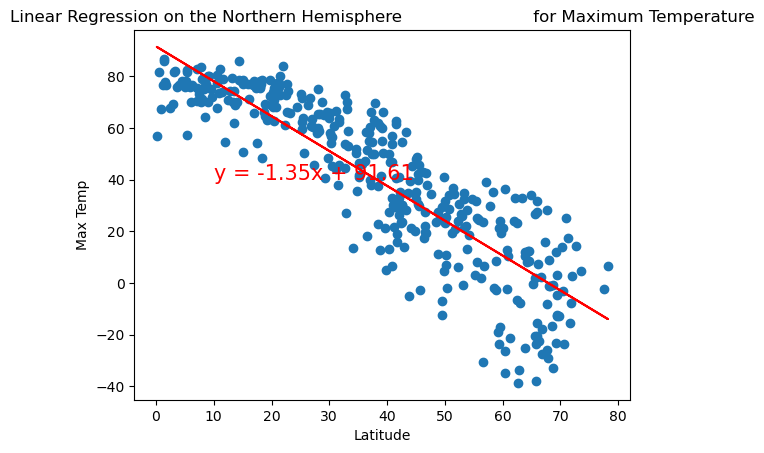

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

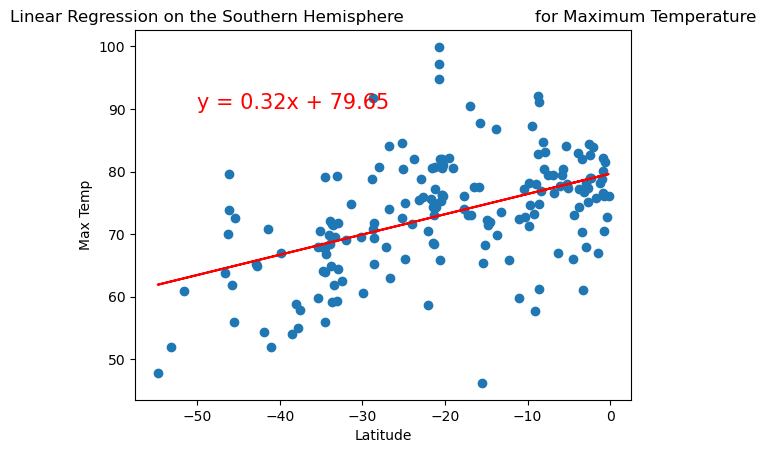

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

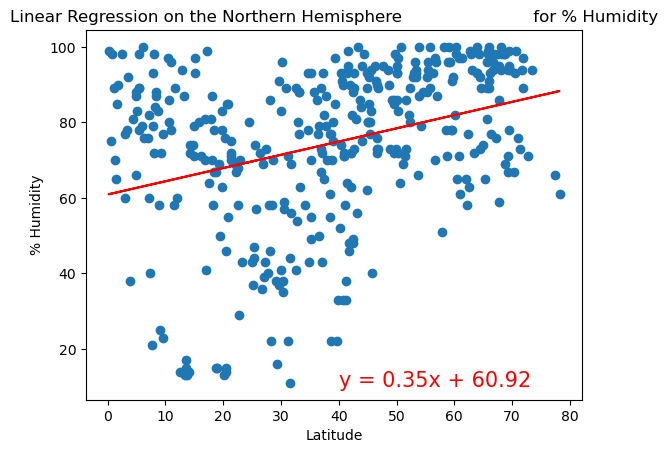

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

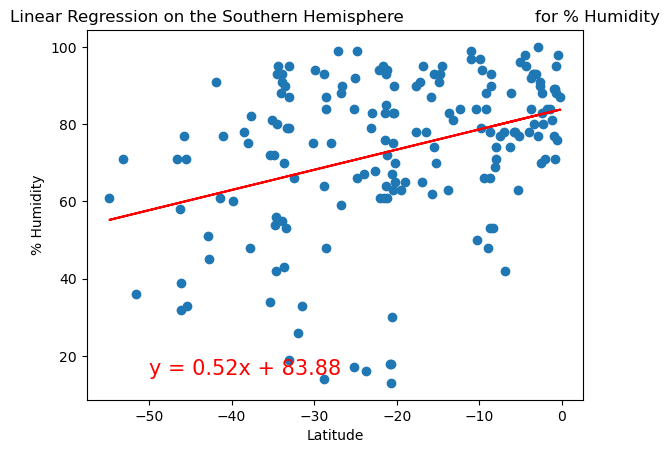

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

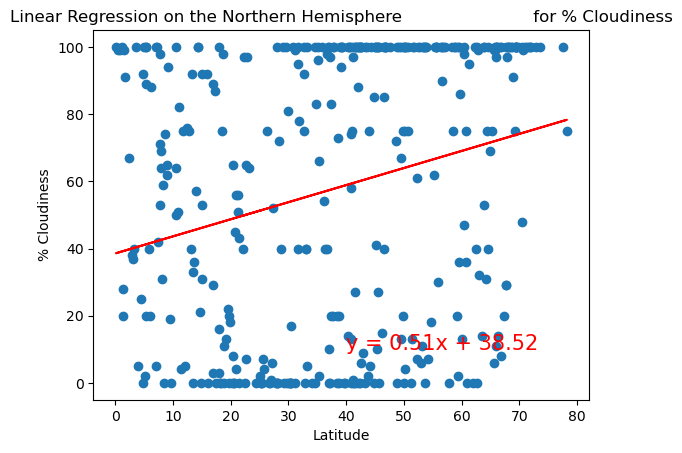

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

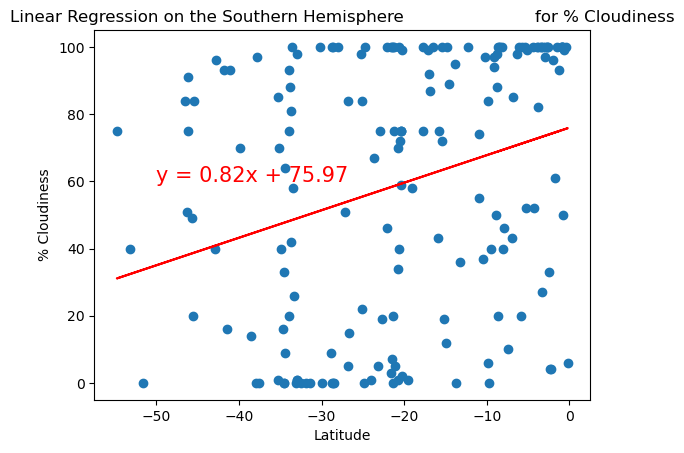

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

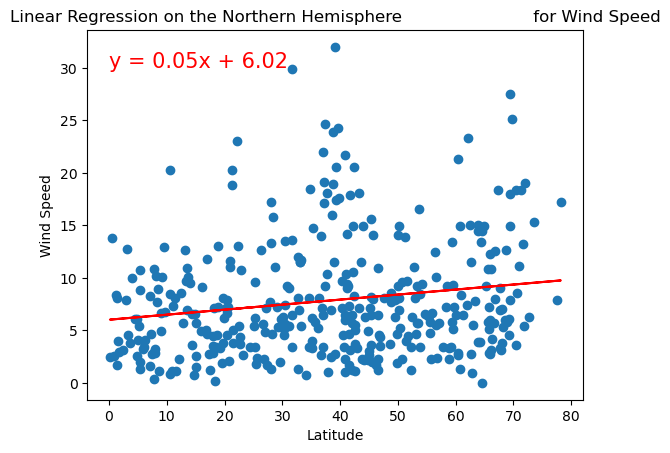

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,30))

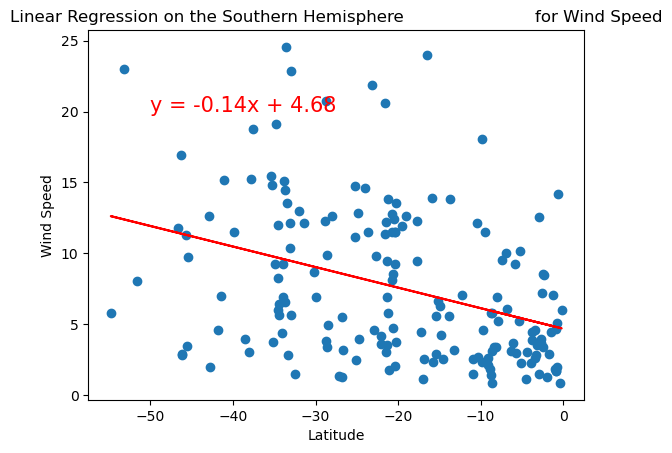

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))